## Лабораторная работа №4
## "Кластеризация (k-средних, иерархическая)"
## Выполнил: Мартынов В.А., ДПИ-15

In [150]:
import pandas as pd
import numpy as np

data_start = pd.read_csv('wine.data', header=0)

data_start


,class,Alcohol,Malicacid,Ash,Alcanity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [151]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

data_scaled = scaler.fit_transform(data_start.iloc[:, 1:])

data_scaled



array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [159]:
from sklearn.decomposition import PCA

# Применяем PCA
pca = PCA()
pca.fit(data_scaled)

# Вычисляем объясненную дисперсию
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Находим количество компонент, необходимых для объяснения 85% дисперсии
n_components = np.argmax(explained_variance >= 0.85) + 1

# Применяем PCA с найденным количеством компонент
pca = PCA(n_components=n_components)

print(f'Количество компонент для объяснения 85% дисперсии: {n_components}')

reduced_data = pca.fit_transform(data_scaled)

print(reduced_data)

data = pca.inverse_transform(reduced_data)

data



Количество компонент для объяснения 85% дисперсии: 6
[[ 3.31675081  1.44346263 -0.16573904 -0.21563119  0.69304284  0.22388013]
 [ 2.20946492 -0.33339289 -2.02645737 -0.29135832 -0.25765463  0.92712024]
 [ 2.51674015  1.0311513   0.98281867  0.72490231 -0.25103312 -0.54927605]
 ...
 [-2.67783946  2.76089913 -0.94094188  0.31203475  1.271355   -0.27306792]
 [-2.38701709  2.29734668 -0.5506962  -0.68828455  0.81395522 -1.17878298]
 [-3.20875816  2.76891957  1.01391366  0.59690319 -0.89519259 -0.29609218]]


array([[ 1.07875012e+00, -4.74483400e-01,  3.27284870e-01, ...,
         5.62584153e-01,  9.32403715e-01,  1.46625208e+00],
       [ 8.49524854e-01, -4.64913966e-01, -1.13645329e+00, ...,
         8.43602928e-01,  7.68464737e-01,  9.88049580e-01],
       [ 5.94592626e-01, -2.12157846e-01,  7.32015858e-01, ...,
         2.17854197e-01,  9.53086253e-01,  7.79021821e-01],
       ...,
       [ 7.42322028e-01,  1.25953945e+00, -1.96220983e-03, ...,
        -2.02882864e+00, -1.76142886e+00,  5.30293502e-02],
       [ 4.25139543e-01,  7.93342251e-02,  2.35061732e-01, ...,
        -1.36851071e+00, -1.88968961e+00,  1.13726524e-01],
       [ 8.29740557e-01,  1.62981685e+00,  1.47114198e+00, ...,
        -1.77015762e+00, -1.37244826e+00, -7.08920385e-02]])

In [163]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
print("Центры кластеров:", kmeans.cluster_centers_)
print("Количество наблюдений в каждом кластере:")
print(pd.Series(kmeans.labels_).value_counts())

Центры кластеров: [[-0.94906327 -0.39710717 -0.49088376  0.16420143 -0.49357938 -0.08641224
   0.02532039 -0.02649394  0.05759414 -0.90734768  0.43938219  0.28161935
  -0.72623671]
 [ 0.15939946  0.88131608  0.17228611  0.51144078 -0.05242079 -1.0254547
  -1.18683554  0.77993522 -0.75568614  0.91077896 -1.19187047 -1.27056347
  -0.37700807]
 [ 0.86386678 -0.30863152  0.37291698 -0.59284794  0.56058257  0.93411267
   0.94972238 -0.6137837   0.56123184  0.20206246  0.51976696  0.74989483
   1.07149674]]
Количество наблюдений в каждом кластере:
0    65
2    62
1    51
Name: count, dtype: int64


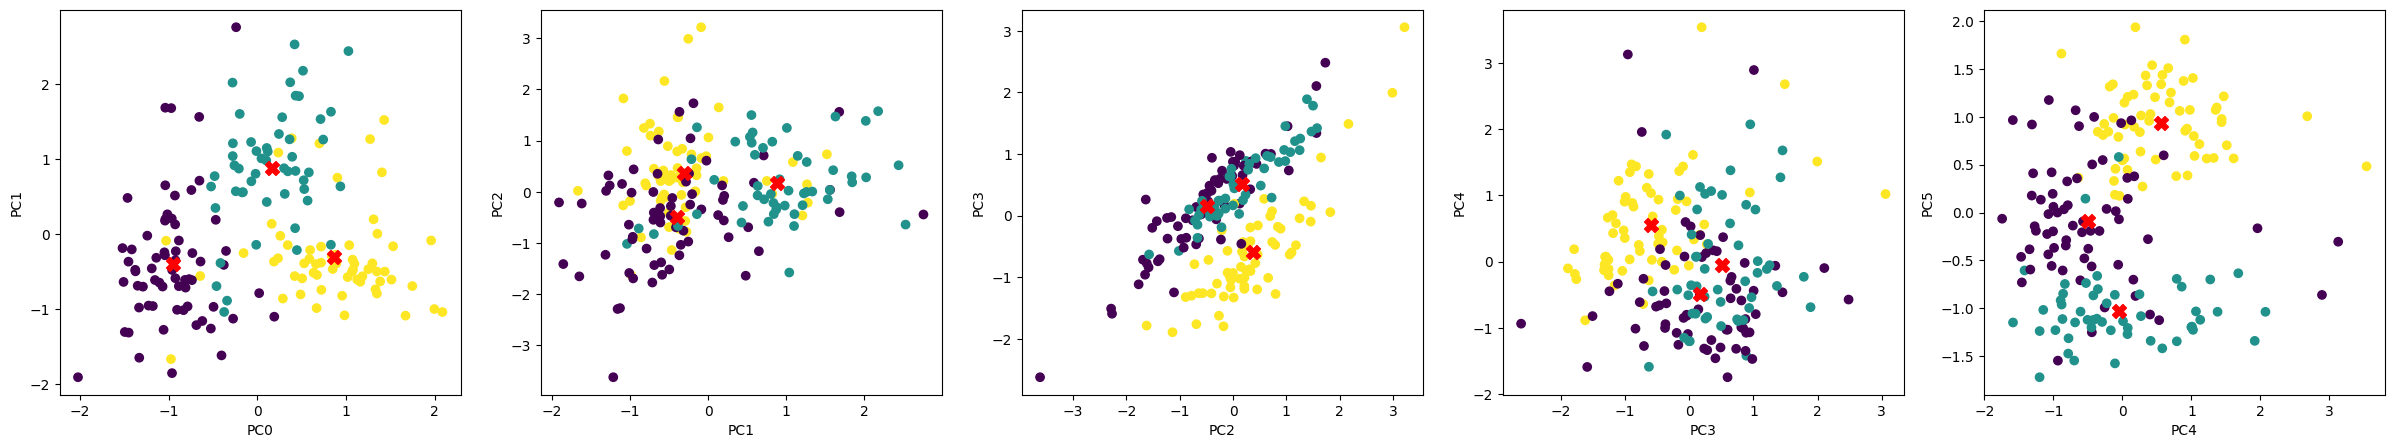

In [173]:
import matplotlib.pyplot as plt

pairs = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]  # пары признаков
plt.figure(figsize=(30, 5))
for i, (x, y) in enumerate(pairs):
    plt.subplot(1, len(pairs), i+1)
    plt.scatter(data[:, x], data[:, y], c=kmeans.labels_, cmap='viridis')
    plt.scatter(kmeans.cluster_centers_[:, x], kmeans.cluster_centers_[:, y], s=100, c='red', marker='X')
    plt.xlabel(f"PC{x}")
    plt.ylabel(f"PC{y}")
plt.show()

В кластере № 0 61 элементов
В кластере № 1 49 элементов
В кластере № 2 68 элементов
Центры
[[ 2.28888211  0.95994724]
 [-2.74392982  1.2141906 ]
 [-0.07601834 -1.73606061]]



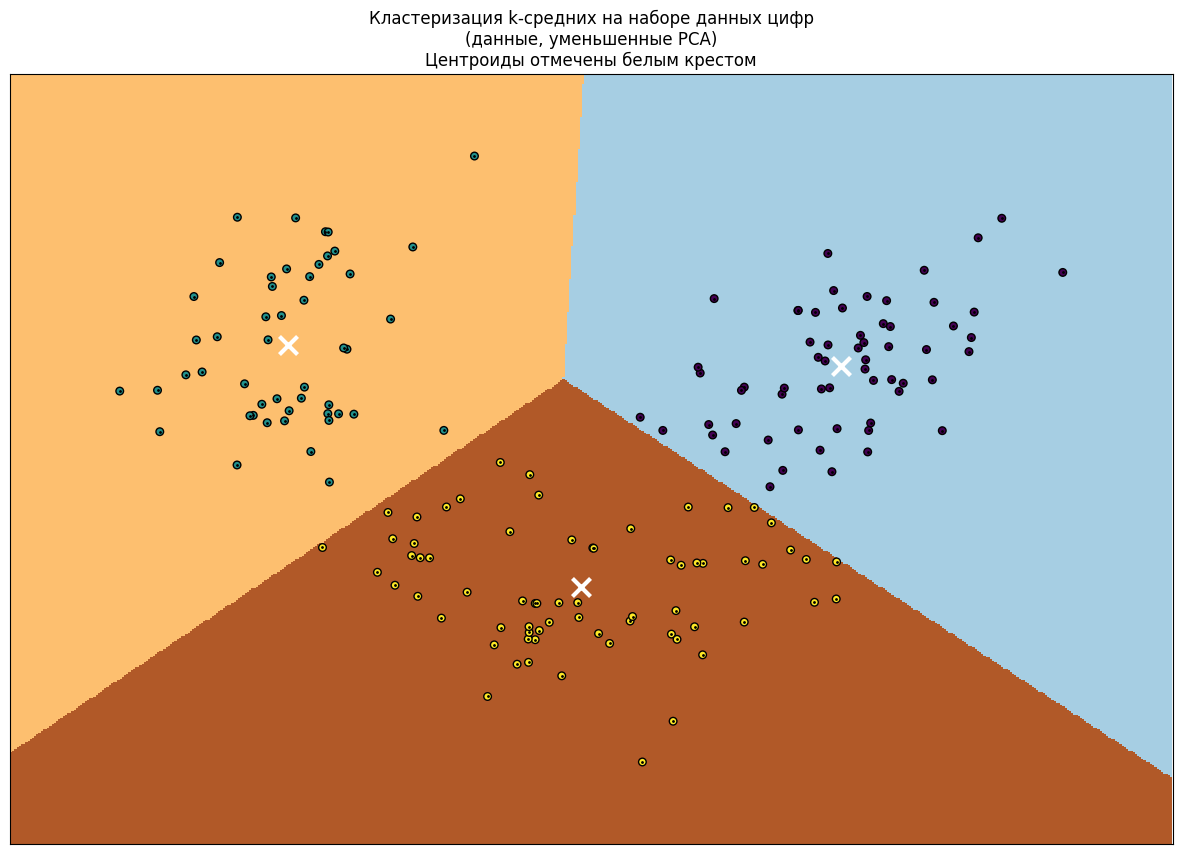

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

new_data = PCA(n_components=2).fit_transform(data)
n_clusters=3

kmeans = KMeans(init='k-means++', n_clusters=n_clusters, n_init=4)

kmeans.fit(new_data)

# Размер шага сетки. Можно уменьшить, чтобы повысить качество VQ.
h = 0.02 # точка в сетке [x_min, x_max]x[y_min, y_max].

# Построим границу принятия решения. Для этого мы назначим цвет каждому
x_min, x_max = new_data[:, 0].min() - 1, new_data[:, 0].max() + 1
y_min, y_max = new_data[:, 1].min() - 1, new_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

sk_kmeans_pred_res = kmeans.predict(new_data)

for i in range(n_clusters):
    count_of_clusters = 0
    for num in sk_kmeans_pred_res:
        if num == i:
            count_of_clusters += 1
    print('В кластере №',i, count_of_clusters, 'элементов')


# Получить метки для каждой точки в сетке. Использовать последнюю обученную модель.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Помещаем результат в цветовую диаграмму.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(15, 10))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.scatter(new_data[:, 0], new_data[:, 1], c=kmeans.labels_, cmap='viridis', s=30, edgecolor='k')

plt.plot(new_data[:, 0], new_data[:, 1], "k.", markersize=2)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
print("Центры",centroids, '', sep='\n')
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

plt.title(
"Кластеризация k-средних на наборе данных цифр\n(данные, уменьшенные PCA)\n"
"Центроиды отмечены белым крестом"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

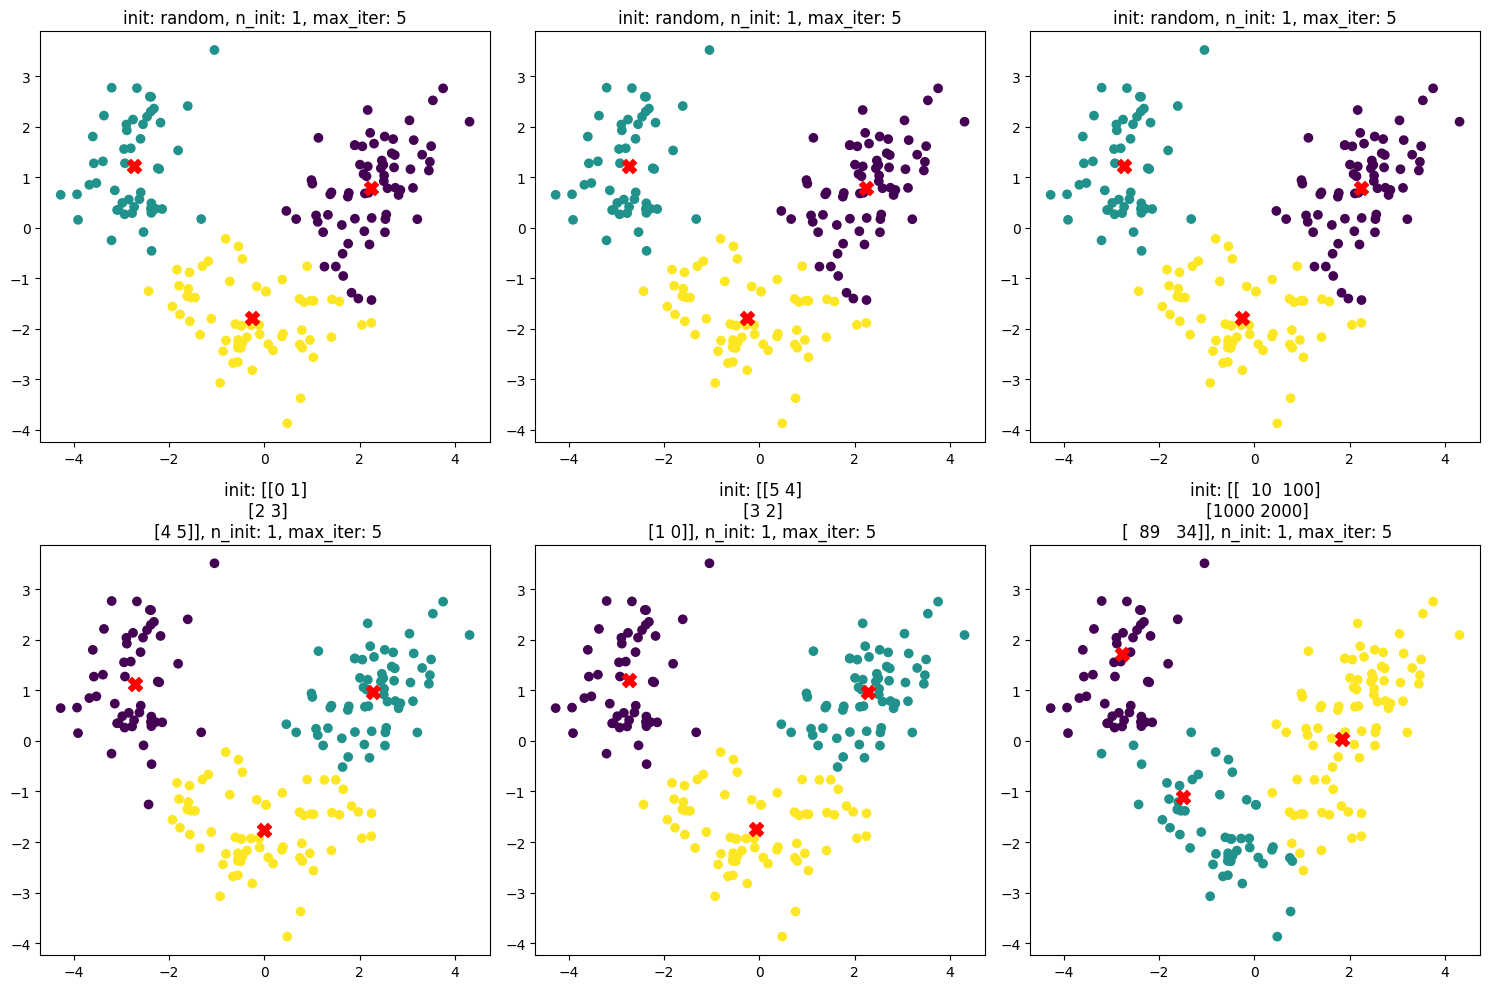

In [194]:
# Задание параметров для исследования init
init_options = [
    ('random', 1, 5),
    ('random', 1, 5),
    ('random', 1, 5),
    (np.array([[0, 1], [2, 3], [4, 5]]), 1, 5),
    (np.array([[5, 4], [3, 2], [1, 0]]), 1, 5),
    (np.array([[10, 100], [1000, 2000], [89, 34]]), 1, 5)
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, (init, n_init, max_iter) in enumerate(init_options):
    # Настройка и обучение модели K-средних с различными init параметрами
    kmeans = KMeans(n_clusters=3, init=init, n_init=n_init, max_iter=max_iter, random_state=42)
    kmeans.fit(new_data)

    # Отображение результатов кластеризации
    axes[i].scatter(new_data[:, 0], new_data[:, 1], c=kmeans.labels_, cmap='viridis')
    axes[i].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', marker='X')
    title = f"init: {init}, n_init: {n_init}, max_iter: {max_iter}"
    axes[i].set_title(title)

plt.tight_layout()
plt.show()

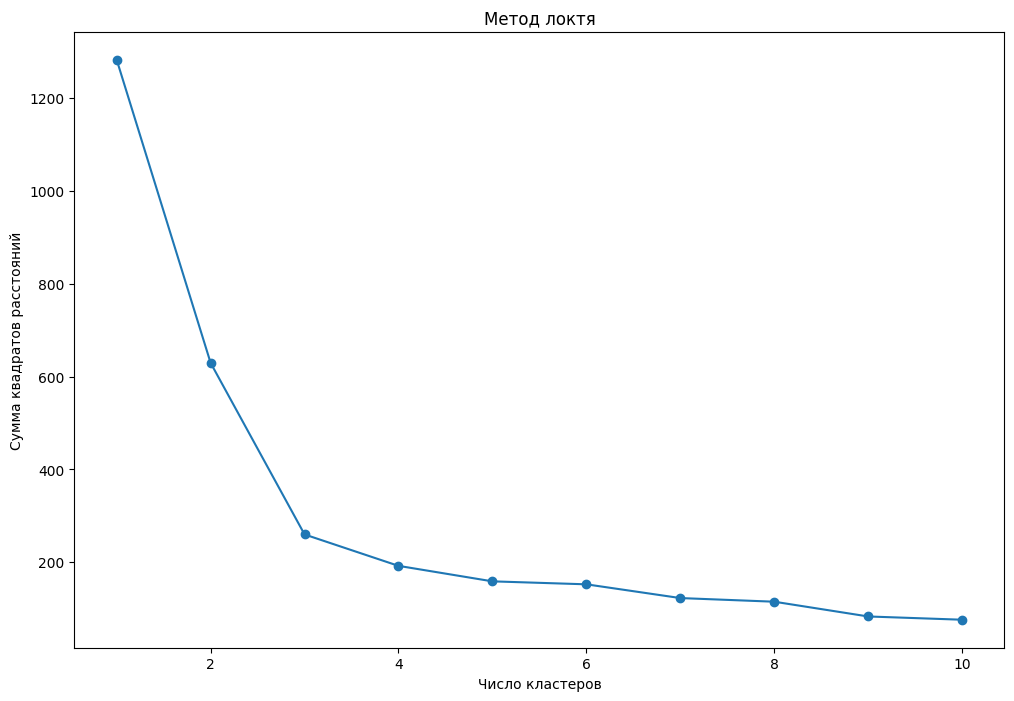

In [188]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(new_data)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Число кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.title('Метод локтя')
plt.show()

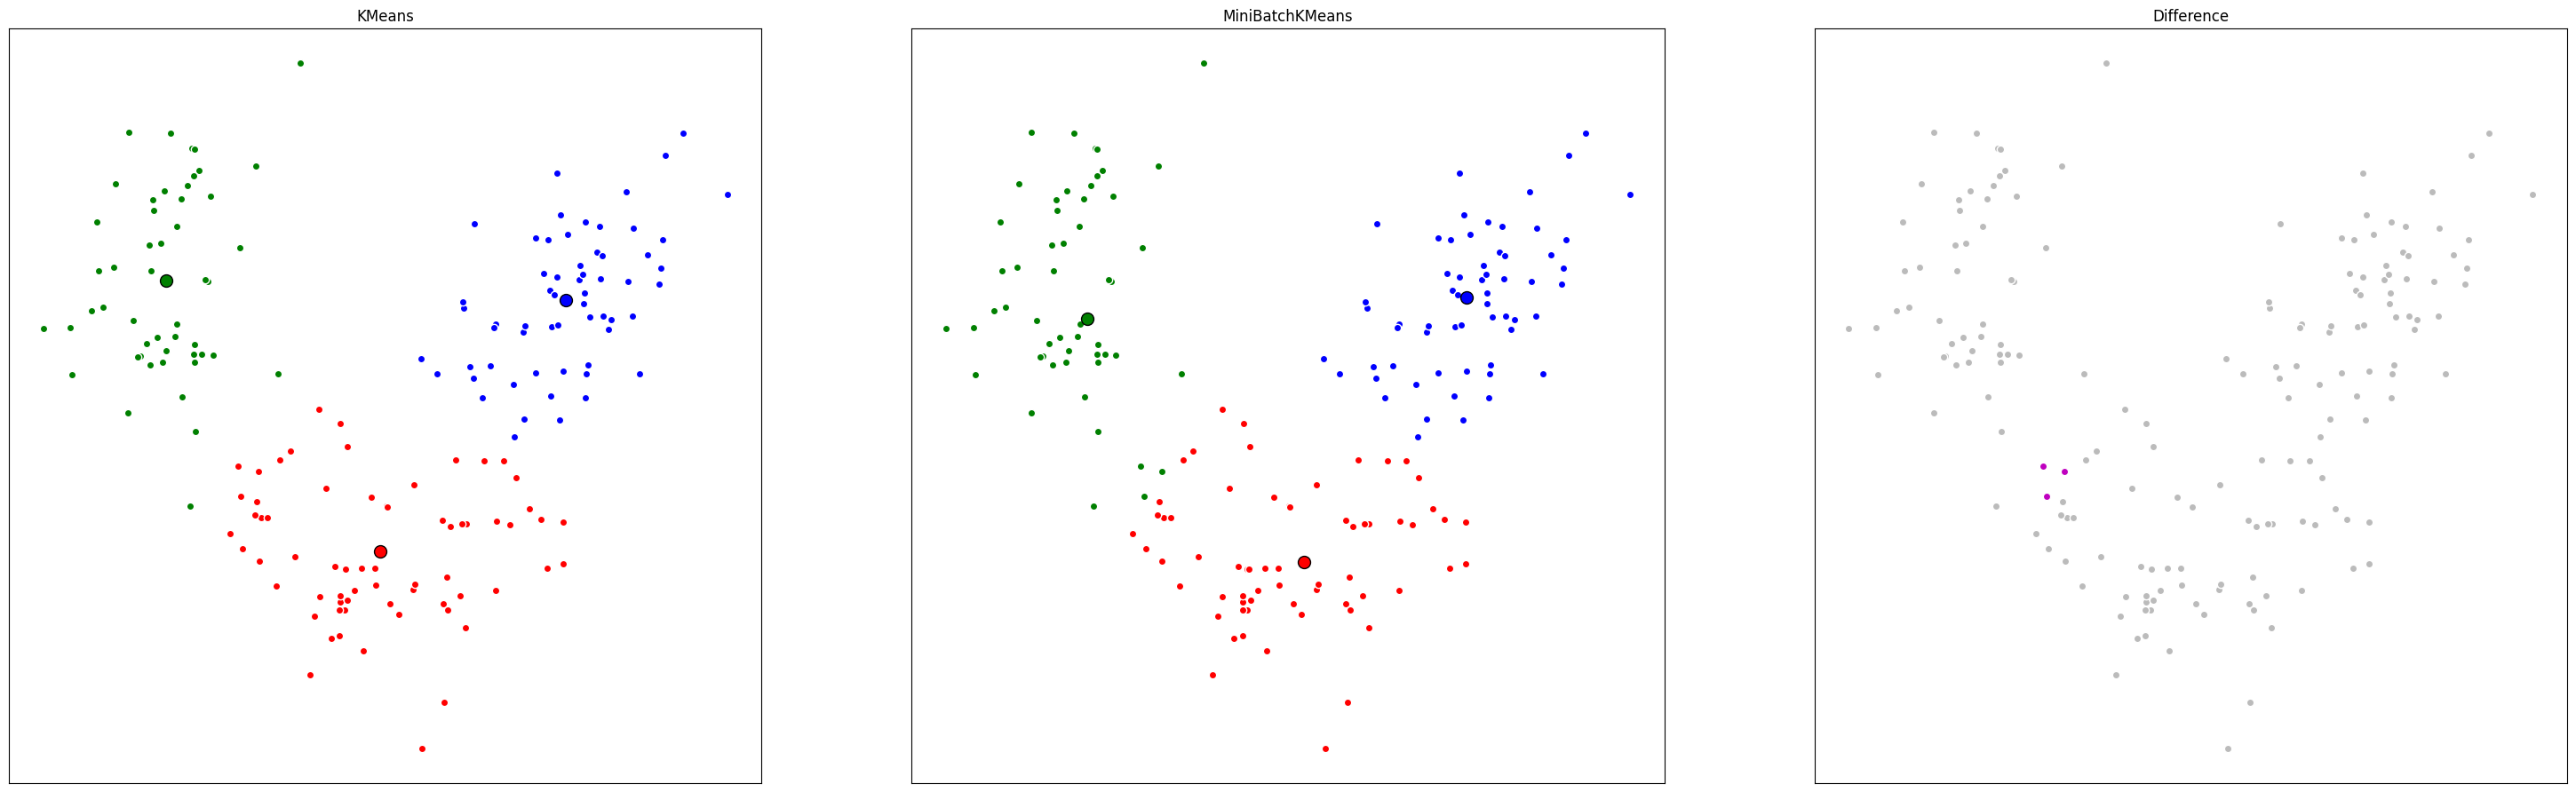

In [192]:
from sklearn.cluster import MiniBatchKMeans

n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(new_data)

mini_kmeans = MiniBatchKMeans(n_clusters=n_clusters, random_state=42)
mini_kmeans.fit(new_data)

k_means_labels = kmeans.labels_
k_means_cluster_centers = kmeans.cluster_centers_
mbk_means_labels = mini_kmeans.labels_
mbk_means_cluster_centers = mini_kmeans.cluster_centers_

fig = plt.figure(figsize=(30, 10))
fig.subplots_adjust(left=0.02, right=0.98, bottom=0.05, top=0.9)
colors = ["red", "green", "blue"]

# KMeans
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = (k_means_labels == k)
    cluster_center = k_means_cluster_centers[k]
    ax.plot(new_data[my_members, 0], new_data[my_members, 1], "w", markerfacecolor=col, marker="o")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=10)
ax.set_title("KMeans")
ax.set_xticks(())
ax.set_yticks(())

# MiniBatchKMeans
ax = fig.add_subplot(1, 3, 2)
for k, col in zip(range(n_clusters), colors):
    my_members = (mbk_means_labels == k)
    cluster_center = mbk_means_cluster_centers[k]
    ax.plot(new_data[my_members, 0], new_data[my_members, 1], "w", markerfacecolor=col, marker="o")
    ax.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col, markeredgecolor="k", markersize=10)
ax.set_title("MiniBatchKMeans")
ax.set_xticks(())
ax.set_yticks(())

# Сравнение различий между метками KMeans и MiniBatchKMeans
different = np.zeros_like(k_means_labels, dtype=bool)
for k in range(n_clusters):
    different |= (k_means_labels == k) != (mbk_means_labels == k)

identical = ~different
ax = fig.add_subplot(1, 3, 3)
ax.plot(new_data[identical, 0], new_data[identical, 1], "w", markerfacecolor="#bbbbbb", marker="o")
ax.plot(new_data[different, 0], new_data[different, 1], "w", markerfacecolor="m", marker="o")
ax.set_title("Difference")
ax.set_xticks(())
ax.set_yticks(())

plt.show()

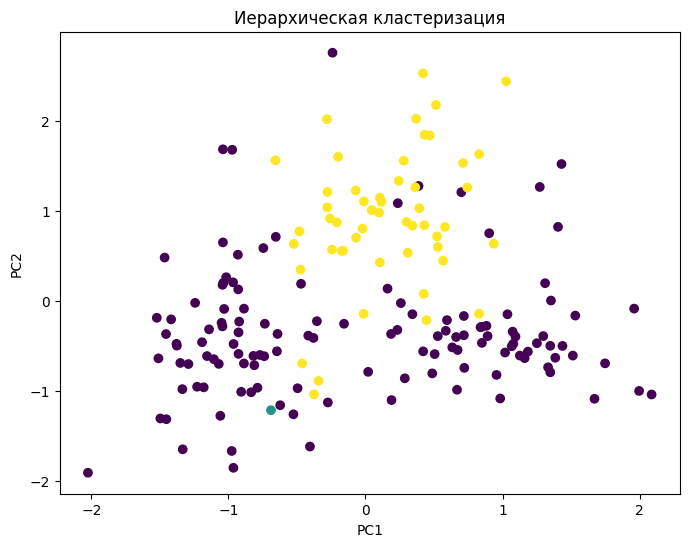

In [201]:
from sklearn.cluster import AgglomerativeClustering

agglomerative = AgglomerativeClustering(n_clusters=3, linkage='average')
agglomerative_labels = agglomerative.fit_predict(data)

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=agglomerative_labels, cmap='viridis')
plt.title("Иерархическая кластеризация")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
